,predictor_1,predictor_2,outcome
,<dbl>,<int>,<dbl>
1,34.64677,0,24.57338
2,27.91050,7,18.69003
3,25.45406,1,20.69922
4,30.47572,5,34.03024
5,38.12373,7,34.50132
6,30.40158,0,21.66519
7,29.42968,2,18.72863
8,29.26305,3,18.34466
9,35.20001,4,24.07899



Call:
lm(formula = outcome ~ predictor_1 + predictor_2, data = sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8300  -2.6147  -0.2508   2.7394  13.7606 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51062    1.41136   0.362    0.718    
predictor_1  0.79869    0.04609  17.330   <2e-16 ***
predictor_2 -0.15349    0.11997  -1.279    0.202    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.055 on 321 degrees of freedom
Multiple R-squared:  0.4862,	Adjusted R-squared:  0.4829 
F-statistic: 151.8 on 2 and 321 DF,  p-value: < 2.2e-16


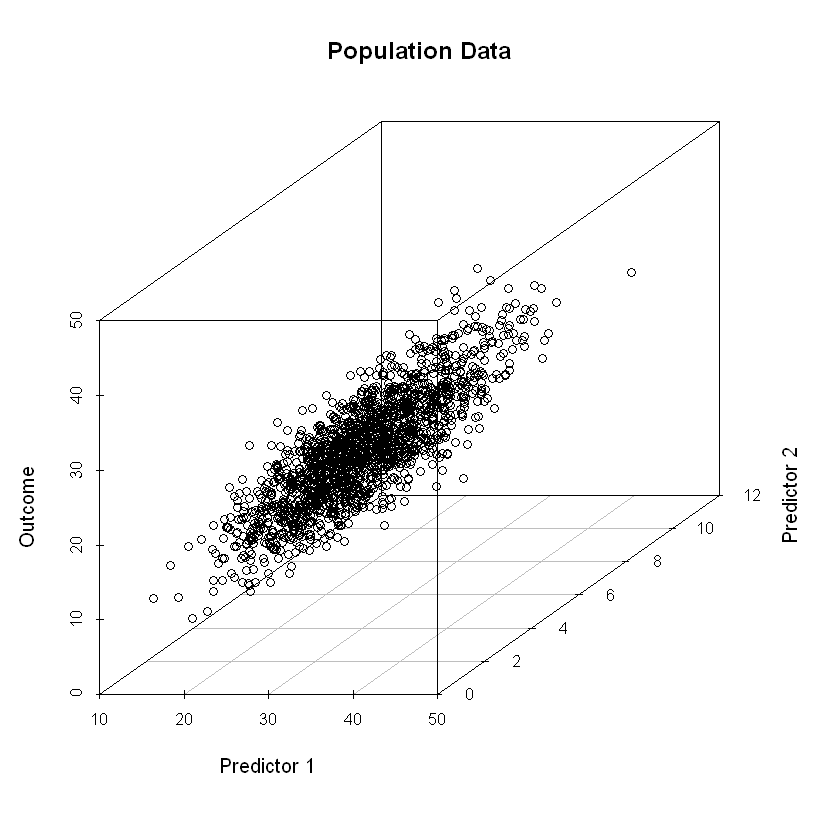

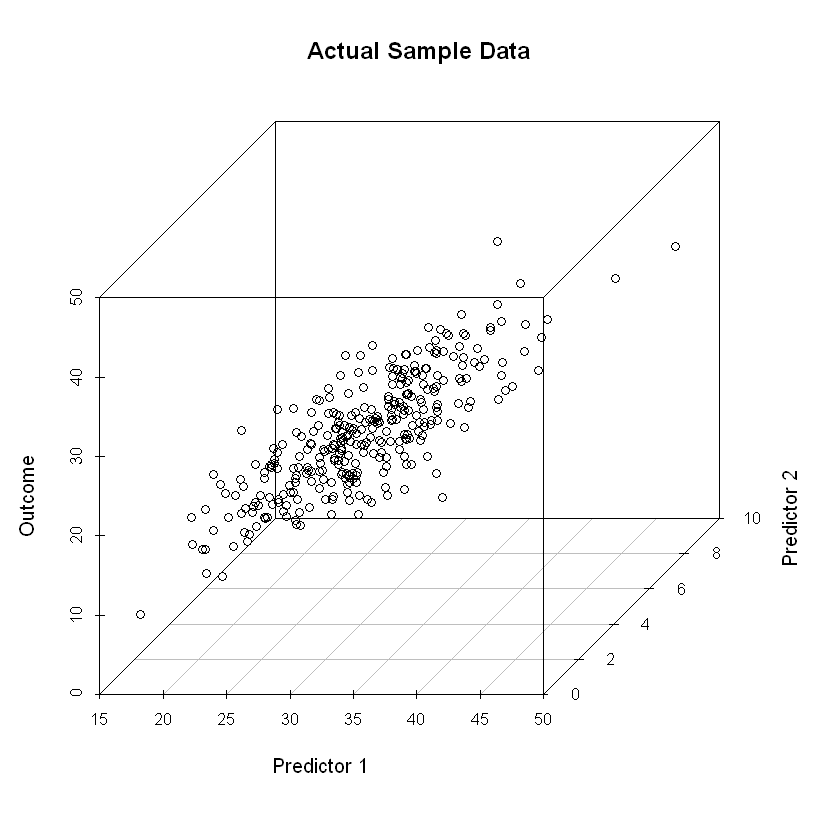

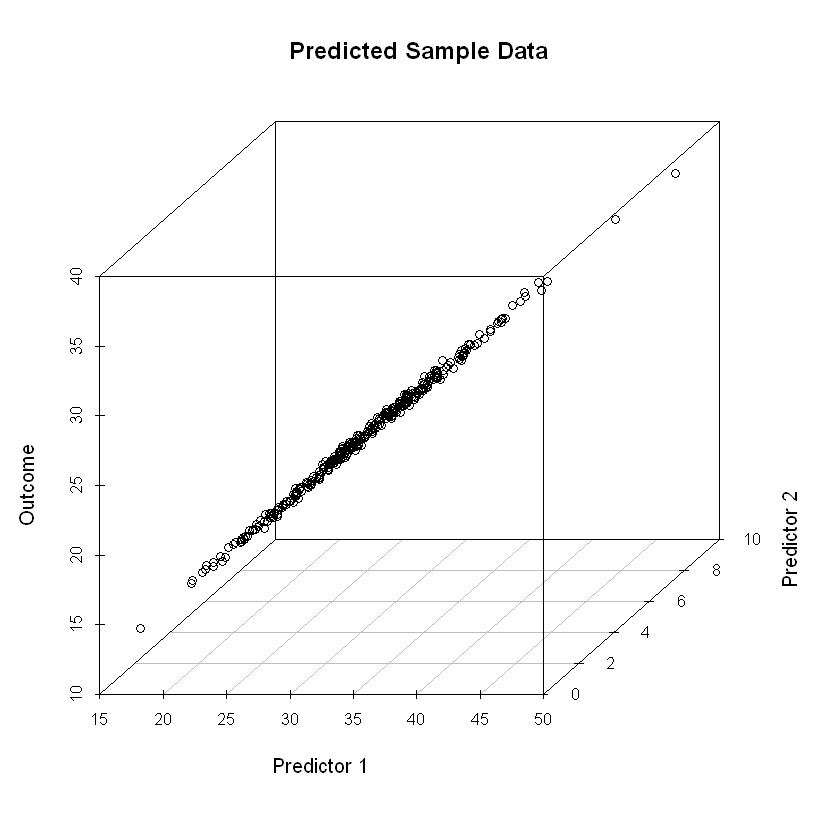

In [86]:
library("scatterplot3d") 

# probabilistically generating population outcome data as a function of two predictors

pop_size = sample(seq(20000), 1)

predictor_1 = rnorm(mean = 30, sd = 5, n = pop_size)

predictor_2 = rpois(lambda = 4, n = pop_size)

num_predictors = 2

coefficients = sample(seq(-1, 1, 0.1), size = num_predictors)

error_disp = sample(seq(25),1)

y_pop = coefficients[1]*predictor_1 + coefficients[2]**predictor_1 + rnorm(mean =0, sd = error_disp, 
                                                                                         n =pop_size)

# creating a dataframe of the population data
df = data.frame(predictor_1 = predictor_1 , predictor_2 = predictor_2, outcome = y_pop)

head(df, 10)

# plotting the population data
scatterplot3d(x=df$predictor_1, z=df$outcome, y=df$predictor_2, main = 'Population Data',
             xlab = 'Predictor 1', ylab = 'Predictor 2', zlab = 'Outcome')


# drawing a random sample from the population
sample_size = sample(seq(100, 500), 1)

sample = df[sample(nrow(df), size = sample_size),]

# performing a linear regression on the sample
mod = lm(outcome ~ predictor_1 + predictor_2, data = sample)
summary(mod)

# plotting the predicted sample data (from the model) against the actual sample data
predictions = predict(mod, newdata = sample) 

scatterplot3d(x=sample$predictor_1, z=sample$outcome, y=sample$predictor_2, main = 'Actual Sample Data',
             xlab = 'Predictor 1', ylab = 'Predictor 2', zlab = 'Outcome')

scatterplot3d(x=sample$predictor_1, z=predictions, y=sample$predictor_2, main = 'Predicted Sample Data',
             xlab = 'Predictor 1', ylab = 'Predictor 2', zlab = 'Outcome')

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.8677561, Df = 1, p = 0.35158



Suggested power transformation:  0.7940337 

[1] "H0 is maintained: The outcome data are homoscedastic around the least squares line."
[1] ""
[1] "###################################################################################################################"
[1] ""
 lag Autocorrelation D-W Statistic p-value
   1     -0.07217598      2.143726   0.178
 Alternative hypothesis: rho != 0
[1] "H0 is maintained: The residuals are independent."
[1] ""
[1] "###################################################################################################################"
[1] ""

	Shapiro-Wilk normality test

data:  studres(mod)
W = 0.99624, p-value = 0.6409

[1] "H0 is maintained: The residuals are normally distributed."
[1] ""
[1] "###################################################################################################################"
[1] ""


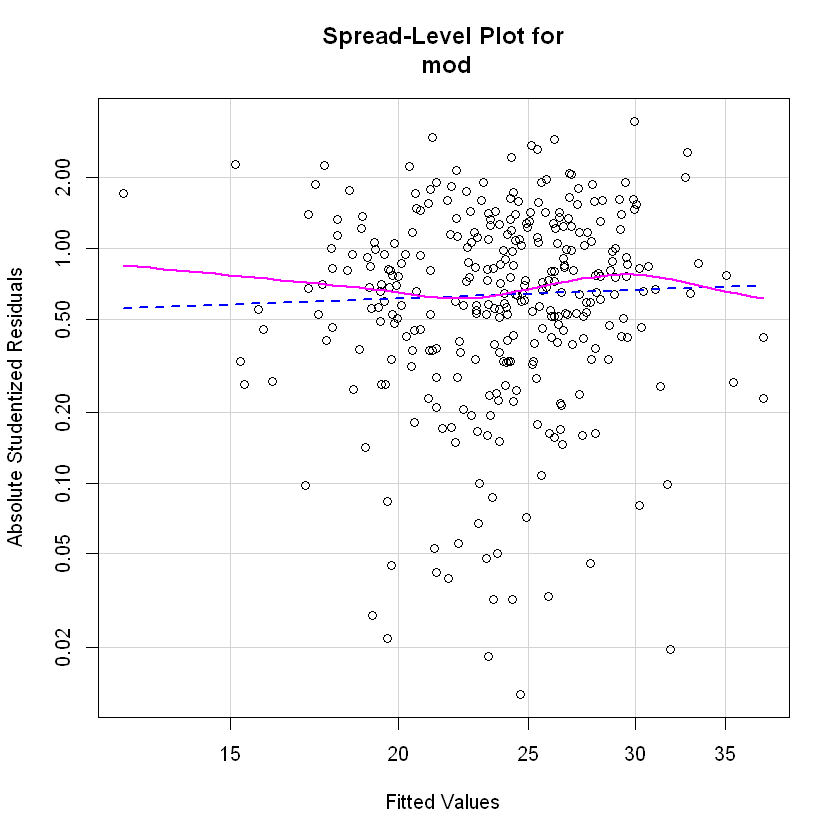

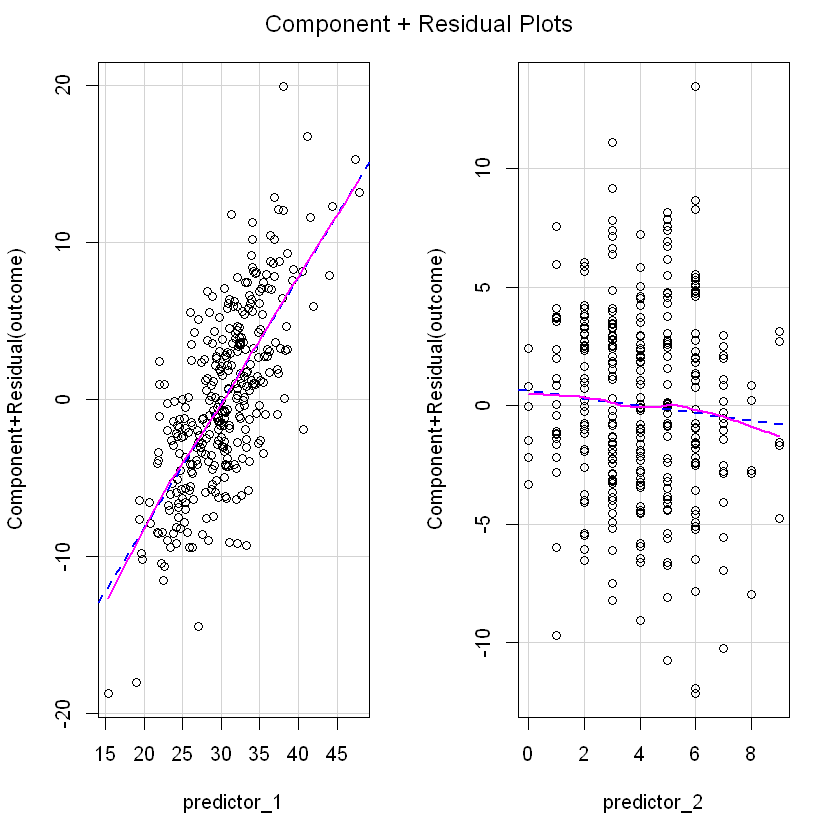

In [110]:
# running some regression diagnostics

library(car)
library(MASS)

# checking for homoscedasticity
homosc_test = ncvTest(mod)
print(homosc_test)
spreadLevelPlot(mod)
if(homosc_test$p <= 0.05){print('H0 is rejected: The outcome data are not homoscedastic around the least squares line!')
                               }else{print('H0 is maintained: The outcome data are homoscedastic around the least squares line.')}
print('')
print('###################################################################################################################')
print('')

# checking for nonindependence of errors
durbin_wat_test = durbinWatsonTest(mod)
print(durbin_wat_test)

if(durbin_wat_test$p <= 0.05){print('H0 is rejected: The residuals are autocorrelated!')
                               }else{print('H0 is maintained: The residuals are independent.')}
print('')
print('###################################################################################################################')
print('')

# checking for normality of residuals
shap_test = shapiro.test(studres(mod))
print(shap_test)
if(shap_test$p.value <= 0.05){print('H0 is rejected: The residuals are not normally distributed!')
                               }else{print('H0 is maintained: The residuals are normally distributed.')}
print('')
print('###################################################################################################################')
print('')

# checking for linearity
crPlots(mod)